In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
df = pd.read_excel("PARN02100.xlsx")
df["Parametro"].value_counts()

Oxigênio Dissolvido                        24
Sólido Dissolvido Total                    24
Escherichia coli**                         24
Cloreto Total                              24
Fósforo Total                              24
Coloração                                  24
Nitrogênio-Nitrito                         24
Temperatura da Água                        24
Turbidez                                   24
DBO (5, 20)                                24
Temperatura do Ar                          24
Sólido Total                               24
Condutividade                              24
Chuvas nas últimas 24h                     24
Nitrogênio Amoniacal                       24
pH                                         24
Carbono Orgânico Total                     24
Nitrogênio-Nitrato                         24
Fósforo-Ortofosfato                        19
Fluoreto Total                             19
Sulfato Total                              19
Ens. Ecotoxic. C/ Ceriodaphnia dub

In [89]:
def create_df(data_entrada, serie):
    new_data = pd.DataFrame()
    new_data[serie] = pd.to_numeric(data_entrada["Valor"].str.replace(',','.'), downcast="float")
    new_data = new_data.set_index(data_entrada["Data Coleta"])
    return(new_data)

In [157]:
df[df["Parametro"]=='Nitrogênio Total']['Valor']

40     0,40000000
41     0,35000000
42     0,37000000
43     0,25000000
44     0,19000000
45     0,39000000
46     0,44000000
47     0,37000000
48     0,45000000
458    0,42000000
505    0,37000000
548    0,49000000
575    0,41000000
619    0,49000000
738    0,50000000
853    0,41000000
Name: Valor, dtype: object

In [150]:
data_ = pd.DataFrame()
#Escherichia coli** -> Coliformes Termotolerantes
w_coli = 0.15
data_coli = df[df["Parametro"]=='Escherichia coli**']
#pH
w_pH = 0.12
data_pH = df[df["Parametro"]=='pH']
#DBO (5, 20)
w_DBO = 0.10
data_DBO = df[df["Parametro"]=='DBO (5, 20)']
#Oxigênio Dissolvido
w_OD = 0.17
data_OD = df[df["Parametro"]=='Oxigênio Dissolvido']
#Temperatura da Água
w_temp = 0.10
data_temp = df[df["Parametro"]=='Temperatura da Água']
#Nitrogênio Total
w_nitro = 0.10
data_nitro = df[df["Parametro"]=='Nitrogênio Total']
#Fósforo Total
w_fosf = 0.10
data_fosf = df[df["Parametro"]=='Fósforo Total']
#Turbidez
w_turb = 0.08
data_turb = df[df["Parametro"]=='Turbidez']
#Sólido Dissolvido Total -> Resíduo Total
w_res = 0.08
data_res = df[df["Parametro"]=='Sólido Dissolvido Total']
#---------------------------------------------------------------------------------------
data_ = pd.merge(create_df(data_DBO, "DBO"),create_df(data_nitro, "Nitrogenio"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_coli, "Coliformes"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_pH, "pH"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_OD, "OD"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_temp, "Temperatura"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_fosf, "Fosforo"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_turb, "Turbidez"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_res, "Residuos"),on='Data Coleta')

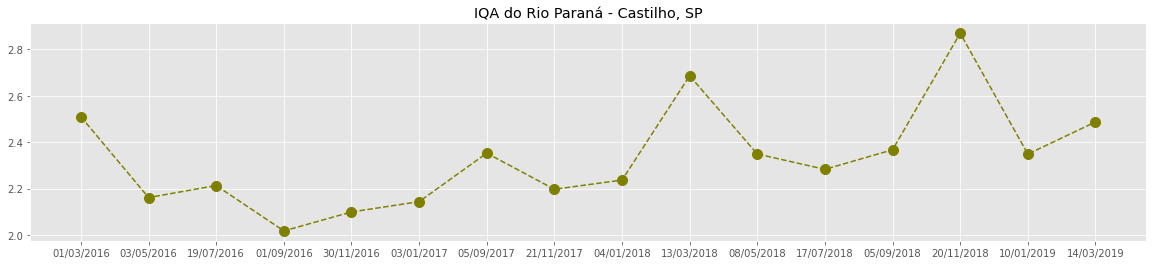

In [152]:
def calcula_IQA(d):
    q = data_.loc[d]
    w = [w_DBO, w_nitro, w_coli, w_pH, w_OD, w_temp, w_fosf, w_turb, w_res]
    IQA = 1
    for e in range(0, len(w)):
        IQA *= q[e]**w[e]
    return IQA

IQA_list = []
for e in data_.index:
    IQA_list.append(calcula_IQA(e))
    
plt.style.use('ggplot')
plt.figure(figsize=(20,4))
plt.plot(data_.index, IQA_list, '--o', color='olive', markersize=10)
plt.grid(True)
plt.title("IQA do Rio Paraná - Castilho, SP")
plt.show()

In [68]:
def to_float(serie):
    li=[]
    for e in serie:
        li.append(float(e.replace(',', '.')))
    return li

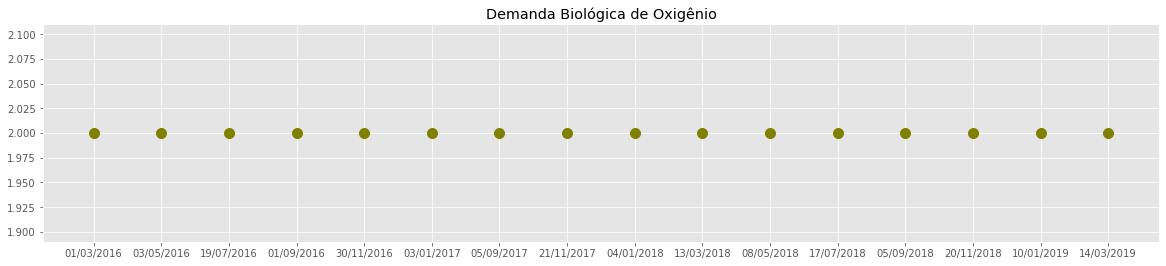

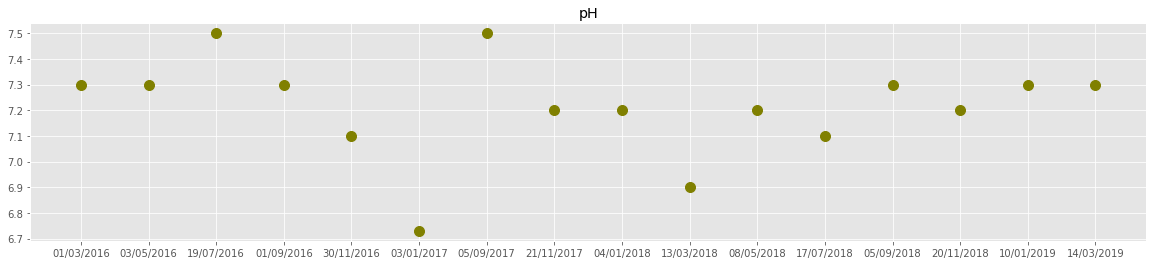

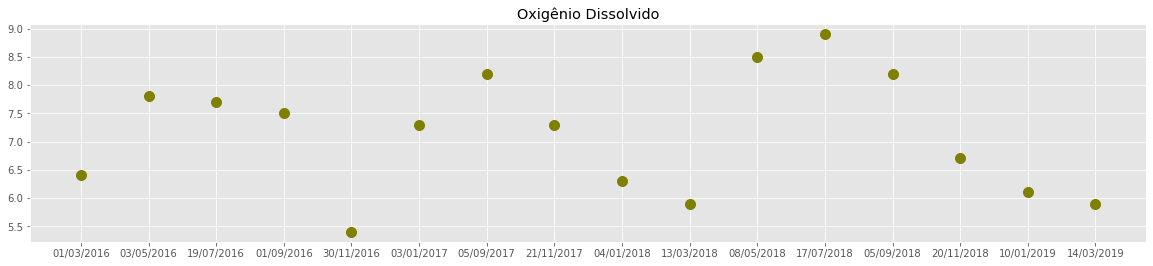

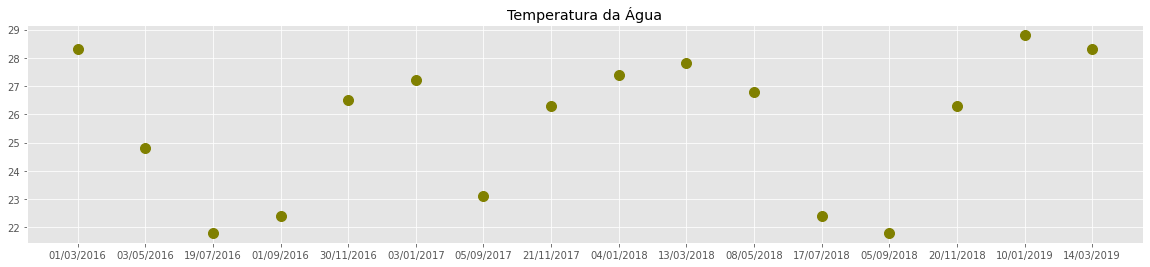

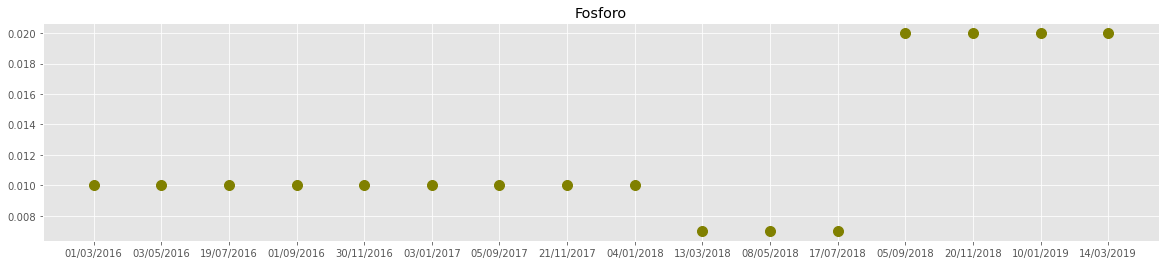

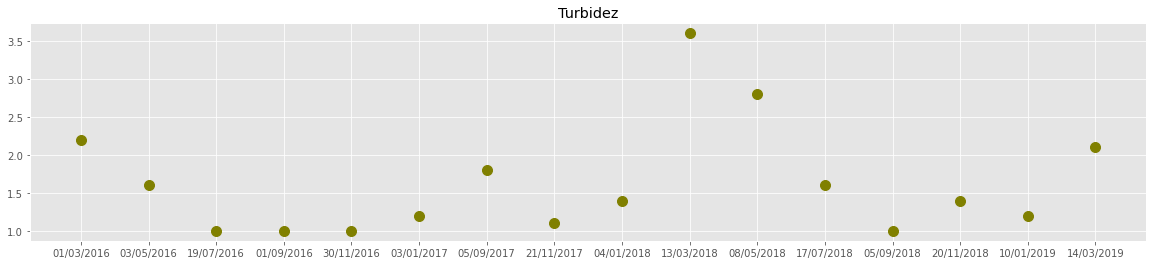

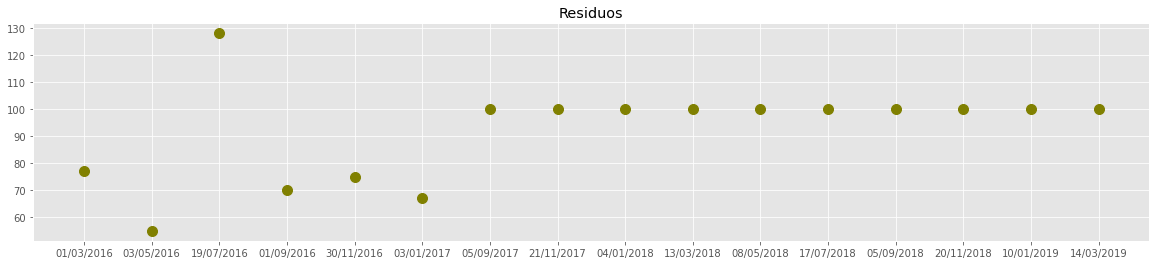

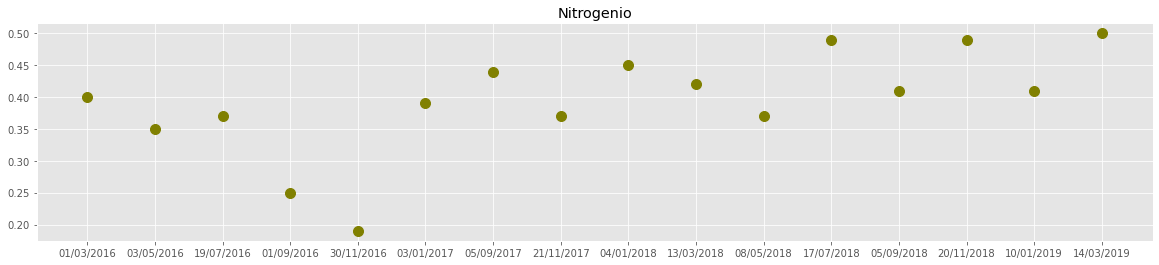

In [93]:
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['DBO'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Demanda Biológica de Oxigênio")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['pH'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("pH")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['OD'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Oxigênio Dissolvido")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['Temperatura'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Temperatura da Água")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['Fosforo'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Fosforo")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['Turbidez'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Turbidez")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['Residuos'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Residuos")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['Nitrogenio'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Nitrogenio")
plt.show()

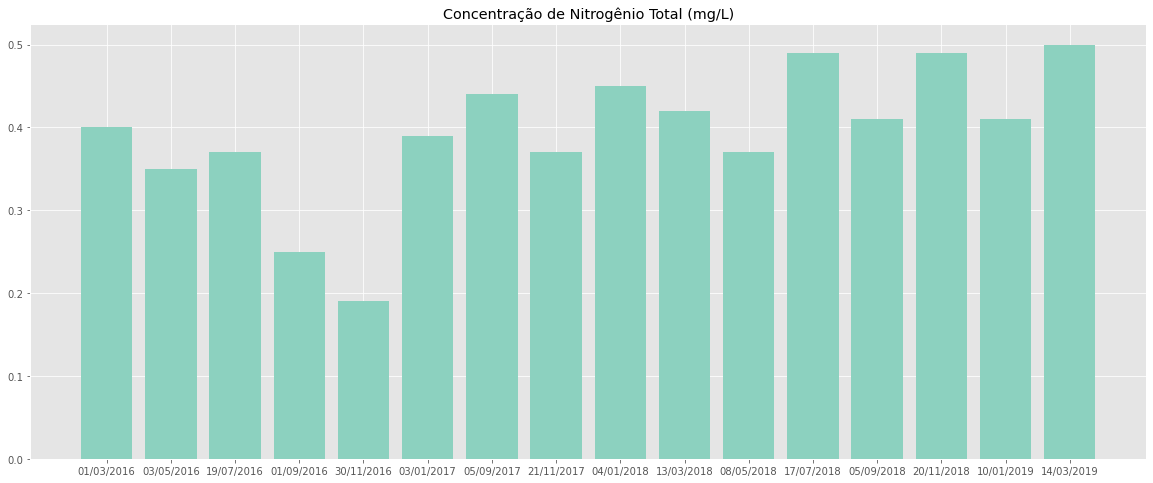

In [160]:
plt.figure(figsize=(20,8))
plt.bar(data_.index, data_['Nitrogenio'], color="#8cd1bf")
plt.title('Concentração de Nitrogênio Total (mg/L)')
plt.savefig("Nitrogenio2.png")
plt.show()